### 借贷审批练习

#### 加载数据，查看数据全貌

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import math

In [2]:
%matplotlib inline

In [3]:
train_df0 = pd.read_csv('datahack_loan/train_ctrUa4K.csv')

In [4]:
train_df0.shape

(614, 13)

In [5]:
train_df0.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train_df0.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train_df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### 数据清洗

##### 清理重复值

In [8]:
train_df0.duplicated().sum()

0

##### 清理缺失值

In [9]:
na = (train_df0.isnull().sum())
na_per = round((train_df0.isnull().sum()/train_df0.shape[0])*100,2)
pd_na = pd.DataFrame(data=[na,na_per],columns=list(na.index)).T
pd_na.columns = ['null_count','null_per']
pd_na
pd_na['null_per'].apply(lambda x:str(x)+'%')
# pd_na

Loan_ID               0.0%
Gender               2.12%
Married              0.49%
Dependents           2.44%
Education             0.0%
Self_Employed        5.21%
ApplicantIncome       0.0%
CoapplicantIncome     0.0%
LoanAmount           3.58%
Loan_Amount_Term     2.28%
Credit_History       8.14%
Property_Area         0.0%
Loan_Status           0.0%
Name: null_per, dtype: object

In [10]:
train_df0.loc[(train_df0.Married.isnull()) & (train_df0.CoapplicantIncome > 0.0),'Married'] = 'Yes'
train_df0.loc[(train_df0.Married.isnull()) & (train_df0.CoapplicantIncome == 0.0),'Married'] = 'No'
train_df0[train_df0.Married.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [11]:
train_df1 = train_df0.dropna(how='any',axis=0)     #其余空项全部删除
# train_df1.Loan_Amount_Term = train_df1.Loan_Amount_Term.astype('int')
train_df1.shape

(480, 13)

In [12]:
train_df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### 特征分析

In [13]:
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

Gender-Male通过率:70.6%
Gender-Female通过率:62.8%
Married-Yes通过率:73.0%
Married-No通过率:62.1%
Dependents-1通过率:65.0%
Dependents-0通过率:68.2%
Dependents-2通过率:76.5%
Dependents-3+通过率:68.30000000000001%
Education-Graduate通过率:70.8%
Education-Not Graduate通过率:62.9%
Self_Employed-No通过率:69.8%
Self_Employed-Yes通过率:65.2%
Credit_History-1.0通过率:79.3%
Credit_History-0.0通过率:10.0%
Property_Area-Rural通过率:61.199999999999996%
Property_Area-Urban通过率:65.3%
Property_Area-Semiurban通过率:78.0%


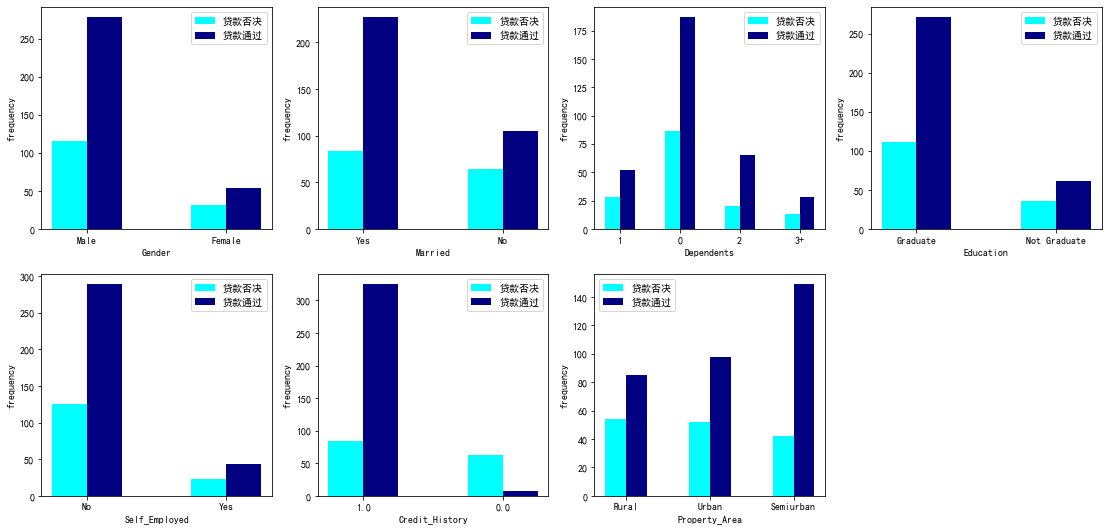

In [14]:
# 由于'Loan_Amount_Term'特征在测试集中有一个值，训练集中没有，在后面one-hot特征选择时又会把把没有的那个值选中，故在训练前决定丢掉这一特征
prob_features = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
fig = plt.figure(figsize=(19,9))
bar_width = 0.25
for i,feature in enumerate(prob_features):
    ax = fig.add_subplot((24)*10+(i+1))
    df_tmp = pd.crosstab(train_df1[feature],train_df1.Loan_Status)
    feature_values = train_df1[feature].unique()
    x_show_list = np.arange(len(feature_values))
    bar_width = 0.25
    for j,feature_value in enumerate(feature_values):
        y = list(df_tmp.loc[feature_value])
        print(f'{feature}-{feature_value}通过率:{round(y[1]/(y[0]+y[1]),3)*100}%')
        if j == 0:
            ax.bar(j,y[0],bar_width,color='aqua',label='贷款否决')
            ax.bar(j+bar_width,y[1],bar_width,color='navy',label='贷款通过')
        else:
            ax.bar(j,y[0],bar_width,color='aqua')
            ax.bar(j+bar_width,y[1],bar_width,color='navy')
    plt.legend()
    plt.xticks(x_show_list+bar_width/2,feature_values)
    plt.xlabel(feature)
    plt.ylabel('frequency')

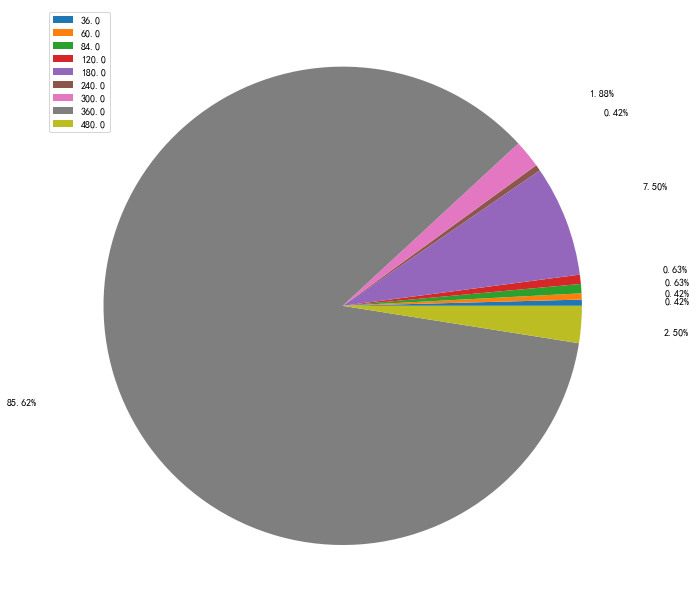

In [15]:
x = train_df1.Loan_Amount_Term.value_counts().sort_index()
fig = plt.figure(figsize=(11,11))
plt.pie(x,startangle=0,autopct="%1.2f%%",pctdistance=1.4)
plt.legend(labels=x.index,loc=2)
plt.show()

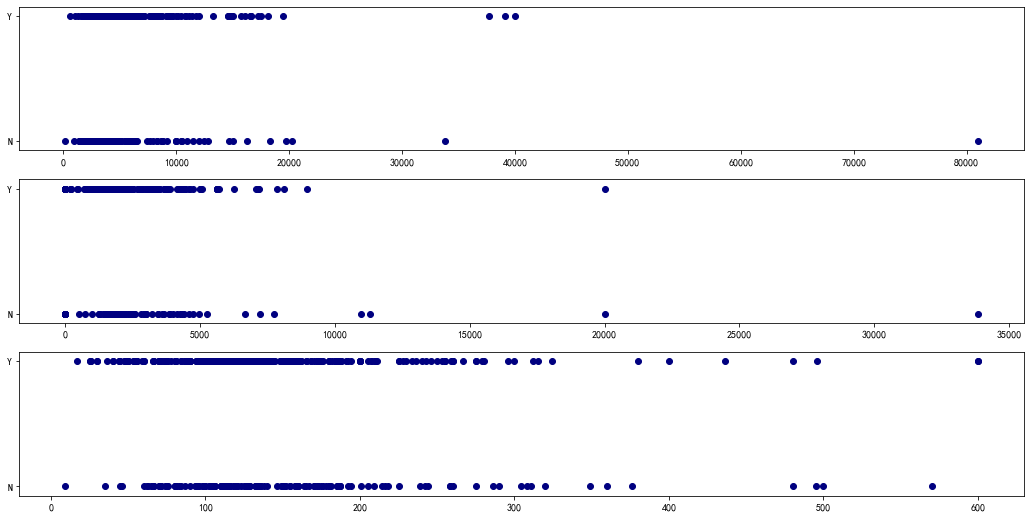

In [16]:
sub_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
fig = plt.figure(figsize=(18,9))
for i,feature in enumerate(sub_features):
    ax = fig.add_subplot(31*10+(i+1))
    x = train_df1[feature]
    y = train_df1.Loan_Status
    ax.scatter(x,y,color='navy')

E:\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


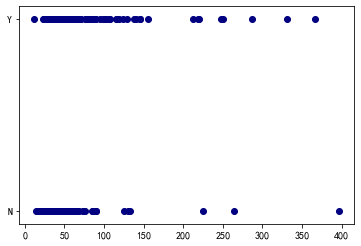

In [17]:
train_df1['financeStat_div_loan'] = train_df1.apply(lambda x:(x['ApplicantIncome']+x['CoapplicantIncome'])/x['LoanAmount'],axis=1)
x = train_df1.financeStat_div_loan
y = train_df1.Loan_Status
plt.scatter(x,y,color='navy')

In [18]:
prob_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

In [19]:
for feature in prob_features:
    df_col_add = pd.get_dummies(train_df1[feature],prefix=feature)
    train_df1 = train_df1.join(df_col_add)
train_df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'financeStat_div_loan', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0.0',
       'Credit_History_1.0', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [20]:
train_df1.shape

(480, 31)

In [21]:
train_df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'financeStat_div_loan', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0.0',
       'Credit_History_1.0', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [22]:
train_df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,0,1,0,1,0,0,1,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,0,1,0,0,1,0,1,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,0,0,1,1,0,0,1,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,0,1,0,1,0,0,1,0,0,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,...,0,1,0,0,1,0,1,0,0,1


In [23]:
new_columns = []
for col_name in train_df1.columns:
    if col_name in prob_features:
        continue
    elif col_name == 'Loan_ID':
        continue
    else:
        new_columns.append(col_name)
for i in range(0,4):
    col = new_columns.pop(0)
    new_columns.append(col)
train_df2 = train_df1[new_columns]
train_df2.Loan_Status = train_df2.Loan_Status.map({'Y':1,'N':0})
train_df2.head()

E:\Anaconda3\anaconda\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Loan_Status,financeStat_div_loan,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
1,0,47.585938,0,1,0,1,0,1,0,0,...,0,0,1,1,0,0,4583,1508.0,128.0,360.0
2,1,45.454545,0,1,0,1,1,0,0,0,...,1,0,1,0,0,1,3000,0.0,66.0,360.0
3,1,41.175000,0,1,0,1,1,0,0,0,...,0,0,1,0,0,1,2583,2358.0,120.0,360.0
4,1,42.553191,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,6000,0.0,141.0,360.0
5,1,36.003745,0,1,0,1,0,0,1,0,...,1,0,1,0,0,1,5417,4196.0,267.0,360.0


In [24]:
train_df2.shape

(480, 23)

### 特征选择

In [25]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [26]:
print(new_columns)

['Loan_Status', 'financeStat_div_loan', 'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0.0', 'Credit_History_1.0', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


In [27]:
new_columns.remove('Loan_Status')
logreg = LogisticRegression()
rfe = RFE(logreg,11)
rfe.fit(train_df2[new_columns],train_df2['Loan_Status'])

E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=11, step=1, verbose=0)

In [28]:
print(rfe.support_)
print(rfe.ranking_)
feature_final = []
for i,feature in enumerate(new_columns):
    if rfe.support_[i] == True:
        feature_final.append(feature)
feature_final

[False  True False  True  True False  True  True False False  True False
 False  True  True  True  True  True False False False False]
[10  1  5  1  1  6  1  1  3  4  1  7  2  1  1  1  1  1 12 11  8  9]


['Gender_Female',
 'Married_No',
 'Married_Yes',
 'Dependents_1',
 'Dependents_2',
 'Education_Not Graduate',
 'Credit_History_0.0',
 'Credit_History_1.0',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

#### 切分数据

In [29]:
from sklearn import model_selection as ms

In [30]:
x = feature_final
y = 'Loan_Status'

In [31]:
x_train,x_test,y_train,y_test = ms.train_test_split(train_df2[x],train_df2[y],test_size=0.25,random_state=5)

In [32]:
print(x_train.shape[0],x_test.shape[0])

360 120


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [34]:
x_train

,Gender_Female,Married_No,Married_Yes,Dependents_1,Dependents_2,Education_Not Graduate,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
22,0,0,1,0,0,1,1,0,0,1,0
428,0,0,1,0,0,0,0,1,1,0,0
368,0,0,1,1,0,0,0,1,0,1,0
194,0,1,0,0,0,0,0,1,1,0,0
208,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
513,0,0,1,0,0,0,0,1,0,1,0
153,0,0,1,0,1,1,0,1,1,0,0
244,0,0,1,0,0,1,0,1,0,1,0
263,1,1,0,0,0,0,0,1,1,0,0


In [35]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_pred = logreg.predict(x_test)

In [37]:
ana_result = pd.Series(y_pred)
ana_result.value_counts()

1    99
0    21
dtype: int64

In [38]:
print(f'Accuracy of LR this predict is:{logreg.score(x_test,y_test)}')

Accuracy of LR this predict is:0.8083333333333333


#### Cross validation

In [39]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [40]:
kfold = model_selection.KFold(n_splits=10,random_state=5)
cv = logreg
results = cross_val_score(cv,x_train,y_train,cv=kfold,scoring='accuracy')
print(f'10 groups cross validation average accuracy:{results.mean()}')
results

10 groups cross validation average accuracy:0.8083333333333332


E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

array([0.69444444, 0.83333333, 0.77777778, 0.86111111, 0.77777778,
       0.83333333, 0.86111111, 0.86111111, 0.83333333, 0.75      ])

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[20, 22],
       [ 1, 77]], dtype=int64)

### real predict

In [42]:
test_df0 = pd.read_csv("F:/openData/loan_data/datahack_loan/test_lAUu6dG.csv")

In [43]:
test_df0.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [44]:
test_df0.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [45]:
test_df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [46]:
test_df1 = test_df0.dropna(how='any',axis=0)

In [47]:
test_df1.shape

(289, 12)

In [48]:
for feature in prob_features:
    df_col_add = pd.get_dummies(test_df1[feature],prefix=feature)
    test_df1 = test_df1.join(df_col_add)
test_df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Credit_History_0.0', 'Credit_History_1.0', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [49]:
feature_final

['Gender_Female',
 'Married_No',
 'Married_Yes',
 'Dependents_1',
 'Dependents_2',
 'Education_Not Graduate',
 'Credit_History_0.0',
 'Credit_History_1.0',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [50]:
test_df2 = test_df1[feature_final]
test_df2.shape

(289, 11)

In [51]:
test_df2.head()

,Gender_Female,Married_No,Married_Yes,Dependents_1,Dependents_2,Education_Not Graduate,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,0,0,0,1,0,0,1
1,0,0,1,1,0,0,0,1,0,0,1
2,0,0,1,0,1,0,0,1,0,0,1
4,0,1,0,0,0,1,0,1,0,0,1
5,0,0,1,0,0,1,0,1,0,0,1


In [52]:
test_y = logreg.predict(test_df2)
test_y

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

#### ROC curve from sklearn import metrics

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr:
[0.         0.         0.02380952 0.04761905 0.04761905 0.04761905
 0.04761905 0.0952381  0.0952381  0.0952381  0.11904762 0.11904762
 0.16666667 0.19047619 0.21428571 0.23809524 0.28571429 0.28571429
 0.30952381 0.33333333 0.33333333 0.38095238 0.42857143 0.42857143
 0.45238095 0.52380952 0.52380952 0.54761905 0.54761905 0.57142857
 0.64285714 0.69047619 0.73809524 0.88095238 0.92857143 1.        ],
 tpr:
[0.         0.05128205 0.05128205 0.17948718 0.20512821 0.23076923
 0.29487179 0.33333333 0.35897436 0.37179487 0.43589744 0.48717949
 0.51282051 0.64102564 0.65384615 0.73076923 0.73076923 0.75641026
 0.75641026 0.82051282 0.84615385 0.84615385 0.8974359  0.93589744
 0.96153846 0.97435897 0.98717949 0.98717949 1.         1.
 1.         1.         1.         1.         1.         1.        ],
 thresholds:
[1.90768099 0.90768099 0.90226756 0.8870962  0.88063446 0.85425586
 0.83731247 0.83454845 0.82855216 0.82567029 0.82406758 0.81475185
 0.81245116 0.80122796 0.79100957 0.788857

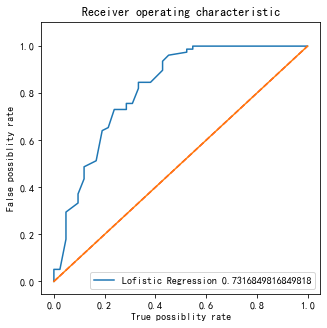

In [54]:
logic_roc_auc = roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds = roc_curve(y_test,logreg.predict_proba(x_test)[:,1])
print(f"fpr:\n\r{fpr},\n\r tpr:\n\r{tpr},\n\r thresholds:\n\r{thresholds}")
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,label=f'Lofistic Regression {logic_roc_auc}')
plt.plot([0,1],[0,1],'r--')
plt.plot([0.0,1.0])
plt.plot(0.0,1.05)
plt.xlabel('True possiblity rate')
plt.ylabel('False possiblity rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=4)
plt.show()

### 决策树预测

In [55]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,auc,accuracy_score

In [56]:
column_DTC_selected = ['Credit_History','Married','Property_Area','Gender','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Status']
df_DTC_train = train_df1[column_DTC_selected]

E:\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


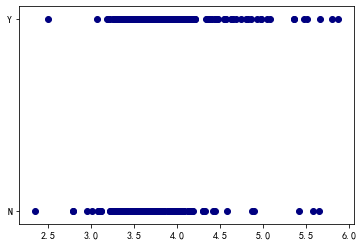

In [57]:
df_DTC_train['financeStat_div_loan'] = df_DTC_train.apply(lambda x:math.log((x['ApplicantIncome']+x['CoapplicantIncome']*0.7)/x['LoanAmount']),axis=1)
x = df_DTC_train.financeStat_div_loan
y = df_DTC_train.Loan_Status
plt.scatter(x,y,color='navy')

In [58]:
df_DTC_train

,Credit_History,Married,Property_Area,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,financeStat_div_loan
1,1.0,Yes,Rural,Male,4583,1508.0,128.0,N,3.785361
2,1.0,Yes,Urban,Male,3000,0.0,66.0,Y,3.816713
3,1.0,Yes,Urban,Male,2583,2358.0,120.0,Y,3.563316
4,1.0,No,Urban,Male,6000,0.0,141.0,Y,3.750755
5,1.0,Yes,Urban,Male,5417,4196.0,267.0,Y,3.443271
...,...,...,...,...,...,...,...,...,...
609,1.0,No,Rural,Female,2900,0.0,71.0,Y,3.709786
610,1.0,Yes,Rural,Male,4106,0.0,40.0,Y,4.631325
611,1.0,Yes,Urban,Male,8072,240.0,253.0,Y,3.483366
612,1.0,Yes,Urban,Male,7583,0.0,187.0,Y,3.702556


In [59]:
df_DTC_train.Gender = df_DTC_train.Gender.map({'Male':1,'Female':0})
df_DTC_train.Married = df_DTC_train.Married.map({'Yes':1,'No':0})
df_DTC_train.Property_Area = df_DTC_train.Property_Area.map({'Urban':0,'Semiurban':1,'Rural':2})
df_DTC_train.Loan_Status = df_DTC_train.Loan_Status.map({'Y':1,'N':0})
df_DTC_train.Credit_History = df_DTC_train.Credit_History.astype(int)

E:\Anaconda3\anaconda\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [60]:
# dtc_model1 = DecisionTreeClassifier(random_state=5)
# dtc_model2 = DecisionTreeClassifier(max_depth=5,random_state=5)
dtc_model3 = DecisionTreeClassifier(max_depth=5,min_impurity_decrease=0.1,random_state=5)

In [61]:
col_dtc = list(df_DTC_train.columns)
col_dtc.remove('ApplicantIncome')
col_dtc.remove('CoapplicantIncome')
col_dtc.remove('LoanAmount')
col_dtc.remove('Loan_Status')
col_dtc

['Credit_History',
 'Married',
 'Property_Area',
 'Gender',
 'financeStat_div_loan']

In [62]:
x_train_dtc,x_test_dtc,y_train_dtc,y_test_dtc = ms.train_test_split(df_DTC_train[col_dtc],df_DTC_train['Loan_Status'],test_size=0.25,random_state=5)

In [63]:
x_train_dtc

,Credit_History,Married,Property_Area,Gender,financeStat_div_loan
22,0,1,1,1,3.524762
428,1,1,2,1,3.517288
368,1,1,1,1,3.587479
194,1,0,2,1,3.553203
208,1,0,0,1,3.738073
...,...,...,...,...,...
513,1,1,1,1,4.575624
153,1,1,2,1,3.004981
244,1,1,1,1,3.967050
263,1,0,2,0,4.094345


In [64]:
# dtc_model1.fit(x_train_dtc,y_train_dtc)
# dtc_model2.fit(x_train_dtc,y_train_dtc)
dtc_model3.fit(x_train_dtc,y_train_dtc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')

In [65]:
# y_pred_decisionTree1 = dtc_model1.predict(x_test_dtc)
# y_pred_decisionTree2 = dtc_model2.predict(x_test_dtc)
y_pred_decisionTree3 = dtc_model3.predict(x_test_dtc)

In [66]:
# confusion_matrix(y_test_dtc,y_pred_decisionTree1) #[[20,22][10,68]]
# confusion_matrix(y_test_dtc,y_pred_decisionTree2) #[[20,22][4,74]] 
confusion_matrix(y_test_dtc,y_pred_decisionTree3) #[[20,22][1,77]] 

array([[20, 22],
       [ 1, 77]], dtype=int64)

In [67]:
y_pred_decisionTree3

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [68]:
# accuracy_score(y_test,y_pred_decisionTree1) #0.733
# accuracy_score(y_test,y_pred_decisionTree2) #0.783
accuracy_score(y_test,y_pred_decisionTree3) #0.808

0.8083333333333333

In [69]:
kfold = model_selection.KFold(n_splits=10,random_state=5)
cv = dtc_model3
results = cross_val_score(cv,x_train_dtc,y_train_dtc,cv=kfold,scoring='accuracy')
print(f'10 groups cross validation average accuracy:{results.mean()}')
results

10 groups cross validation average accuracy:0.7666666666666666


array([0.69444444, 0.83333333, 0.77777778, 0.86111111, 0.77777778,
       0.83333333, 0.86111111, 0.66666667, 0.83333333, 0.52777778])

### Real Predict decisionTreeClassifier

In [70]:
df_DTC_test = test_df0.dropna(how='any',axis=0)
df_DTC_test.shape

(289, 12)

In [71]:
df_DTC_test['financeStat_div_loan'] = df_DTC_test.apply(lambda x:math.log((x['ApplicantIncome']+x['CoapplicantIncome']*0.7)/x['LoanAmount']),axis=1)
df_DTC_test.head()

E:\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,financeStat_div_loan
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,3.951244
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,3.488782
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,3.404397
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3.737670
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,3.401285


In [72]:
df_DTC_train.columns

Index(['Credit_History', 'Married', 'Property_Area', 'Gender',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status',
       'financeStat_div_loan'],
      dtype='object')

In [73]:
col_DTC_test = list(df_DTC_train.columns)
col_DTC_test.remove('ApplicantIncome')
col_DTC_test.remove('CoapplicantIncome')
col_DTC_test.remove('LoanAmount')
col_DTC_test.remove('Loan_Status')
df_DTC_test_1 = df_DTC_test[col_DTC_test]
df_DTC_test_1['Gender'] = df_DTC_test_1['Gender'].map({'Male':1,'Female':0})
df_DTC_test_1['Married'] = df_DTC_test_1['Married'].map({'Yes':1,'No':0})
df_DTC_test_1['Property_Area'] = df_DTC_test_1['Property_Area'].map({'Urban':0,'Semiurban':1,'Rural':2})
df_DTC_test_1['Credit_History'] = df_DTC_test_1['Credit_History'].astype(int)
df_DTC_test_1

E:\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
E:\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

,Credit_History,Married,Property_Area,Gender,financeStat_div_loan
0,1,1,0,1,3.951244
1,1,1,0,1,3.488782
2,1,1,0,1,3.404397
4,1,0,0,1,3.737670
5,1,1,0,1,3.401285
...,...,...,...,...,...
361,1,1,1,1,3.643919
362,1,1,0,1,3.839148
363,1,1,0,1,3.700615
365,1,1,2,1,3.743544


In [74]:
y_predict_dtc = dtc_model3.predict(df_DTC_test_1)
y_predict_dtc

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [76]:
res = np.array_equal(test_y,y_predict_dtc)
res

True